In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
#Venturi
Q = np.array([1, 1.5, 2.0, 2.5, 3.0, 3.5])*10**(-3)/60
Pd = np.mean(np.array([[35,34], [61,58], [92,85],[ 125,120], [166,160], [209,204]])*10**2, axis = 1)
Pv = np.mean(np.array([[61, 46], [99, 100], [180,168], [272,272], [374,390], [493, 500]])*10**2, axis = 1)
da = 6.4*10**(-3)
db = 2.5*10**(-3)
Pv

array([ 5350.,  9950., 17400., 27200., 38200., 49650.])

In [176]:
IdealPv = (8*Q**2*(1-da**4/db**4))/(np.pi**2*db**4)
IdealPv
# for i in range(0, len(Q)):
#     print(f"${Q[i]*10**6:.2f}*10^6$", f"${-Pv[i]:.0f}$", f"${-Pd[i]:.0f}$" , f"${IdealPv[i]:.1f}$", f"${dP[i]:.2f}$", f"${Cd[i]:.2f}$" )


array([ -241.7999939 ,  -544.04998627,  -967.19997559, -1511.24996185,
       -2176.19994507, -2962.04992524])

In [177]:
Qmeasured = np.pi/4 * db**2 * np.sqrt(2*9.81*(-Pv)/(998*(1-(da/db)**4)))
Qmeasured = Qmeasured * 60 * 10**3
Qmeasured

array([0.46635644, 0.63599343, 0.84103819, 1.05153938, 1.24615703,
       1.42069456])

Text(0, 0.5, '$P_v$ [Pa]')

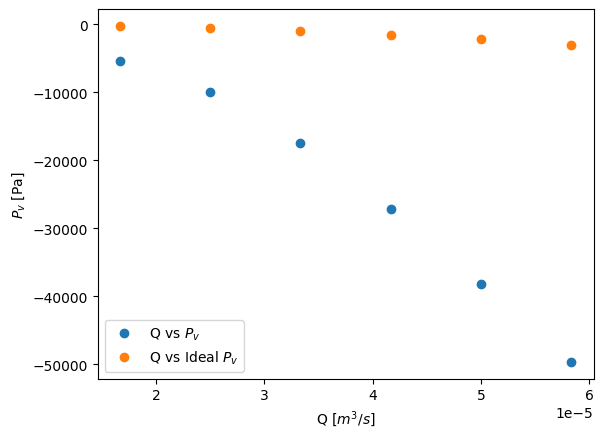

In [51]:
plt.plot(Q, -Pv, 'o', label = 'Q vs $P_v$')
plt.plot(Q, IdealPv, 'o', label = 'Q vs Ideal $P_v$')
plt.legend()
plt.xlabel('Q $[m^3/s]$')
plt.ylabel('$P_v$ [Pa]')

[ 6.70853414 14.88098231 26.42557224 41.29123338 59.3605035  80.55677679]
[0.35238673 0.60773943 0.90394857 1.25122825 1.66489963 2.10921333]
$6.71$ $0.35$
$14.88$ $0.61$
$26.43$ $0.90$
$41.29$ $1.25$
$59.36$ $1.66$
$80.56$ $2.11$


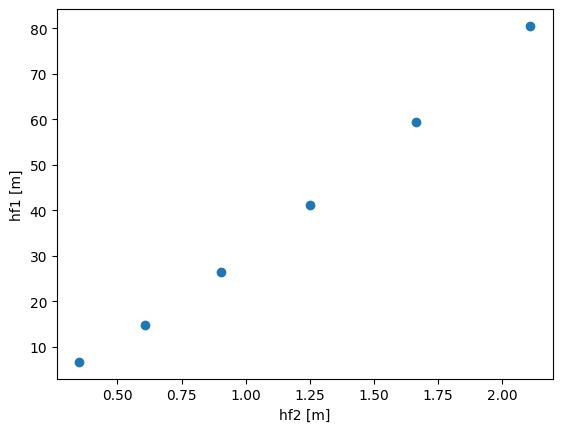

In [150]:
hf1 = Pv/(998*9.81) + 2*Q**2/(9.81*np.pi**2*db**4) * (da**4/db**4-1)
hf2 = Pd/(998*9.81)
print(hf1)
print(hf2)
plt.plot(hf2, hf1, 'o', label = 'hf1 vs hf2')
plt.xlabel('hf2 [m]')
plt.ylabel('hf1 [m]');

for i in range(6):
    print(f"${hf1[i]:.2f}$", f"${hf2[i]:.2f}$")

In [62]:
from scipy.optimize import curve_fit

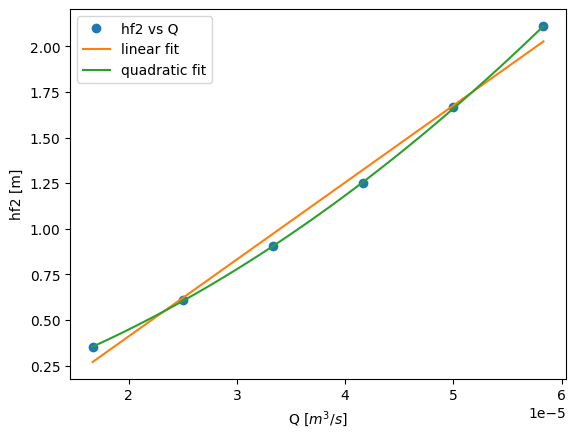

In [89]:
def linfunc(x, a, b):
    return a*x + b

def quadfunc(x, a, b, c):
    return a*x**2 + b*x + c


parlin, covlin = curve_fit(linfunc, Q, hf2)
parquad, covquad = curve_fit(quadfunc, Q, hf2, p0 = [100,1,1])

X = np.linspace(np.min(Q), np.max(Q), 100)
Ylin = linfunc(X, *parlin)
Yquad = quadfunc(X, *parquad)


plt.plot(Q, hf2, 'o', label = 'hf2 vs Q')
plt.plot(X,Ylin, label = 'linear fit')
plt.plot(X,Yquad, label = 'quadratic fit')
plt.legend()
plt.xlabel('Q $[m^3/s]$')
plt.ylabel('hf2 [m]');


In [181]:
##Orifice
d = 4*10**(-3)
D = 6.4*10**(-3)    
At = np.pi/4 * (d)**2
beta = d/D
Q = np.array([1, 1.5, 2.0, 2.5, 3.0, 3.5])*10**(-3)/60
dP = np.mean(np.array([[18, 19], [40, 41], [75, 69], [114, 115], [165, 166], [232, 235]])*10**2, axis = 1)
Cd = Q/( At * np.sqrt(2*dP/(998*(1-beta**4))) )
print(Cd, "[m^3/s]")
print(np.mean(Cd))

dp = 6.35*10**2
Q = np.mean(Cd)*At*np.sqrt(2*dp/(998*(1-beta**4)))
print(Q)

[0.6340896  0.64283607 0.64283607 0.63719705 0.63600239 0.62468502] [m^3/s]
0.636274366775276
9.798137921412865e-06


array([10., 10.])